# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 609


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&units=" + units + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_response = requests.get(city_url)
        city_weather = city_response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        
        # Seperating out date as it's a bit complicated
        city_date_raw_1 = city_weather['dt']
        city_date_raw = time.gmtime(city_date_raw_1)
        year = city_date_raw.tm_year
        month = city_date_raw.tm_mon
        day = city_date_raw.tm_mday
        city_date = f'{year}-{month}-{day}'


        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | iqaluit
Processing Record 2 of Set 1 | alesund
Processing Record 3 of Set 1 | vadso
Processing Record 4 of Set 1 | port-aux-francais
Processing Record 5 of Set 1 | grytviken
Processing Record 6 of Set 1 | port mathurin
Processing Record 7 of Set 1 | qaqortoq
Processing Record 8 of Set 1 | juneau
Processing Record 9 of Set 1 | qarauyl
Processing Record 10 of Set 1 | olonkinbyen
Processing Record 11 of Set 1 | longyearbyen
Processing Record 12 of Set 1 | edinburgh of the seven seas
Processing Record 13 of Set 1 | ironwood
Processing Record 14 of Set 1 | kiuruvesi
Processing Record 15 of Set 1 | adamstown
Processing Record 16 of Set 1 | waitangi
Processing Record 17 of Set 1 | tralee
Processing Record 18 of Set 1 | lorengau
Processing Record 19 of Set 1 | krasnoturansk
Processing Record 20 of Set 1 | puerto natales
Processing Record 21 of Set 1 | okhotsk
Processing Record 22 of Set 1 | thompson
Proc

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          573
Lat           573
Lng           573
Max Temp      573
Humidity      573
Cloudiness    573
Wind Speed    573
Country       573
Date          573
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,iqaluit,63.7506,-68.5145,-23.15,59,20,2.57,CA,2024-2-7
1,alesund,62.4723,6.1549,-2.59,79,100,5.14,NO,2024-2-7
2,vadso,70.0744,29.7487,-11.91,92,75,8.23,NO,2024-2-7
3,port-aux-francais,-49.3500,70.2167,7.10,99,100,4.42,TF,2024-2-7
4,grytviken,-54.2811,-36.5092,8.65,56,24,2.07,GS,2024-2-7


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,iqaluit,63.7506,-68.5145,-23.15,59,20,2.57,CA,2024-2-7
1,alesund,62.4723,6.1549,-2.59,79,100,5.14,NO,2024-2-7
2,vadso,70.0744,29.7487,-11.91,92,75,8.23,NO,2024-2-7
3,port-aux-francais,-49.3500,70.2167,7.10,99,100,4.42,TF,2024-2-7
4,grytviken,-54.2811,-36.5092,8.65,56,24,2.07,GS,2024-2-7


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

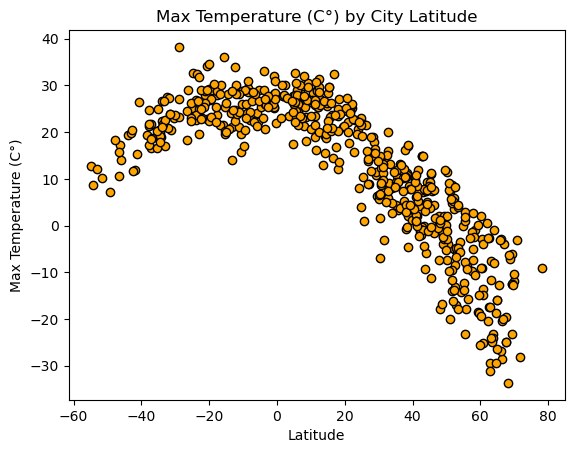

In [8]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values, y_values, marker = 'o', edgecolors= "black", color = "orange")

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C°)')
plt.title('Max Temperature (C°) by City Latitude')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

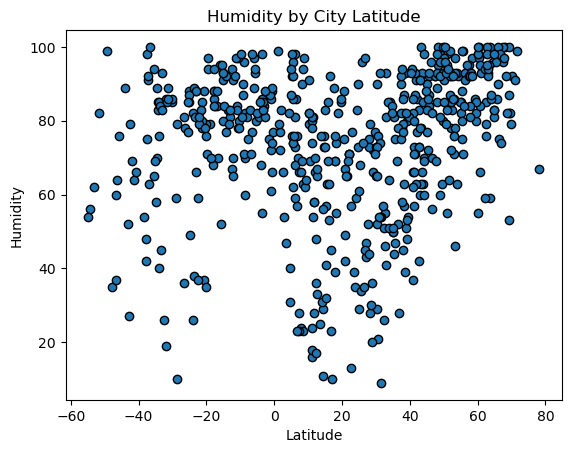

In [9]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
plt.scatter(x_values, y_values, marker = 'o', edgecolors= "black")

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Humidity by City Latitude')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

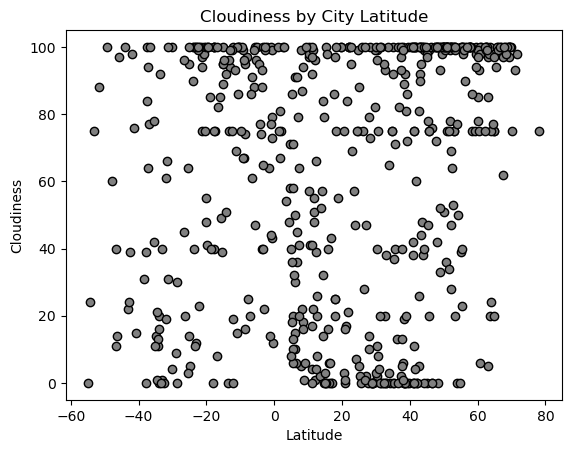

In [10]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
plt.scatter(x_values, y_values, marker = 'o', edgecolors= "black", color = "grey")

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Cloudiness by City Latitude')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

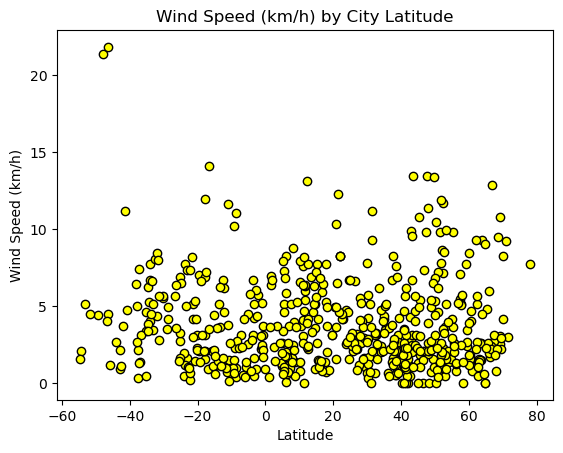

In [11]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
plt.scatter(x_values, y_values, marker = 'o', edgecolors= "black", color = "yellow")

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (km/h)')
plt.title('Wind Speed (km/h) by City Latitude')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def linear_regression_plotter(x,y):
    
    #Perform Linear Regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)

    #Plot scatter plot
    plt.scatter(x,y)
    plt.xlabel('Latitude')

    #Plot regression line
    regress_values = x * slope + intercept
    plt.plot(x, regress_values, color='red')
    

    print(f"The r-value is: {rvalue**2}")
    # Create labels and title etc. when running for specific needs, then run plt.show()
    

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,iqaluit,63.7506,-68.5145,-23.15,59,20,2.57,CA,2024-2-7
1,alesund,62.4723,6.1549,-2.59,79,100,5.14,NO,2024-2-7
2,vadso,70.0744,29.7487,-11.91,92,75,8.23,NO,2024-2-7
6,qaqortoq,60.7167,-46.0333,-13.51,66,6,4.65,GL,2024-2-7
7,juneau,58.3019,-134.4197,-0.88,97,75,0.00,US,2024-2-7


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] <0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,port-aux-francais,-49.3500,70.2167,7.10,99,100,4.42,TF,2024-2-7
4,grytviken,-54.2811,-36.5092,8.65,56,24,2.07,GS,2024-2-7
5,port mathurin,-19.6833,63.4167,26.97,71,41,7.01,MU,2024-2-7
11,edinburgh of the seven seas,-37.0676,-12.3116,16.64,63,77,1.39,SH,2024-2-7
14,adamstown,-25.0660,-130.1015,24.72,88,95,6.90,PN,2024-2-7


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.8049656370410281


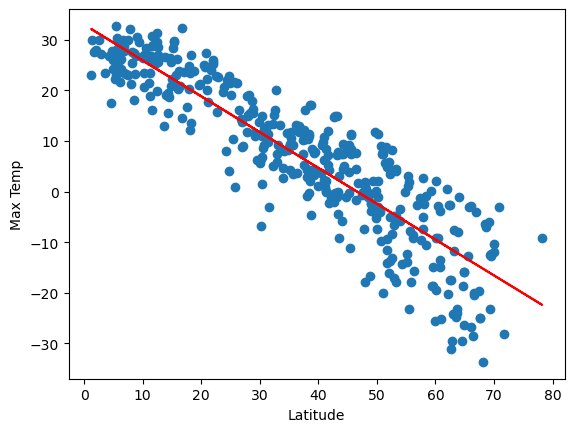

In [15]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
linear_regression_plotter(x_values, y_values)

plt.ylabel('Max Temp')
plt.show()

The r-value is: 0.315110595572982


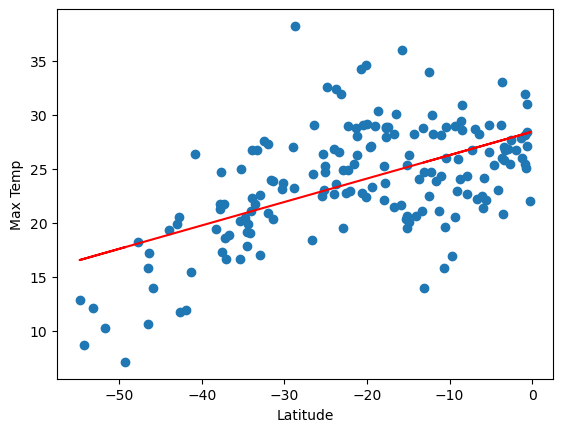

In [16]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
linear_regression_plotter(x_values, y_values)

plt.ylabel('Max Temp')
plt.show()

**Discussion about the linear relationship:** While max temperature decreases as latitude increases in the Northern Hemisphere, the relationship flips in the Southern Hemipshere, with max temperature increasing as latitude increases. The explanation for this, of course, is that the hottest temperatures on earth are recorded on the equator, at latitude 0. 

As we approach the equator, or latitude 0, in either the Northern OR Southern Hemipshere, temperature increases. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.20507965128737252


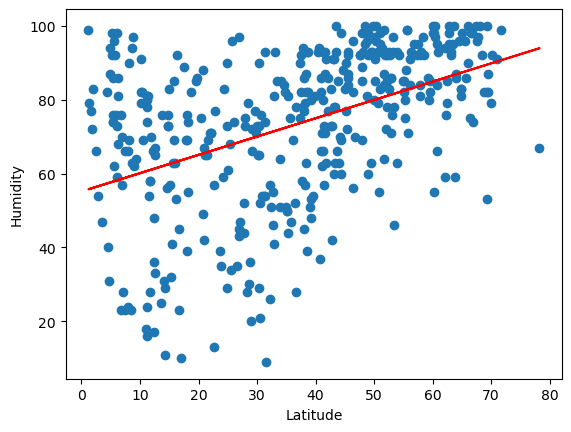

In [17]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
linear_regression_plotter(x_values, y_values)

plt.ylabel('Humidity')
plt.show()

The r-value is: 0.10951540283347265


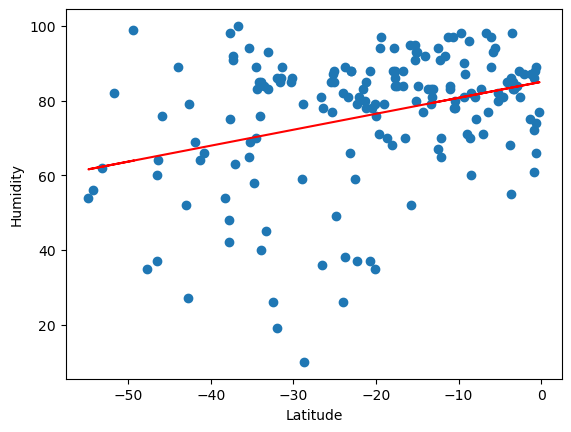

In [18]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
linear_regression_plotter(x_values, y_values)

plt.ylabel('Humidity')
plt.show()

**Discussion about the linear relationship:** Looking at these plots and the above humidity plot that incorporates data from both the northern and southern hemipshere, I can say fairly certainly that humidity is not significantly affected by latitudinal positioning. There is little correlation between x and y axis here. Other factors such as percipitation and climate distort the data from having as strong a correlation as temperature.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.13777809205764227


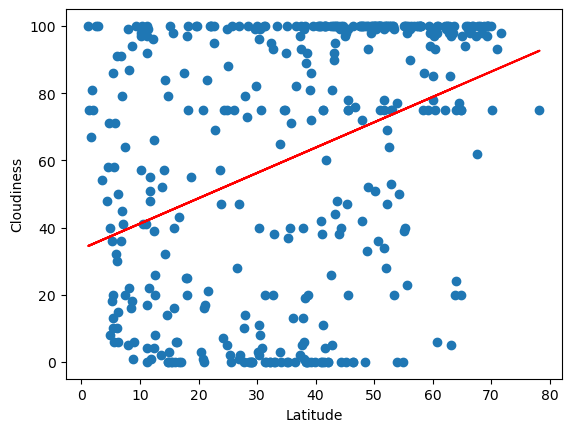

In [19]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
linear_regression_plotter(x_values, y_values)

plt.ylabel('Cloudiness')
plt.show()

The r-value is: 0.08723042696438399


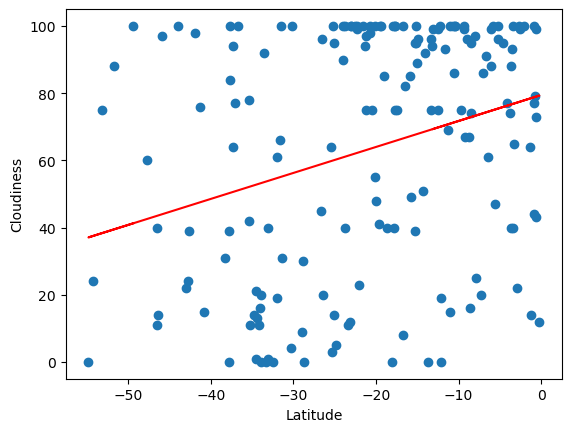

In [20]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
linear_regression_plotter(x_values, y_values)

plt.ylabel('Cloudiness')
plt.show()

**Discussion about the linear relationship:** Once again, both of these scatter plots shows little correlation between cloud cover and latitude. There is a large distribution of cloudiness levels among each latitude. I notice that the data points tend to group around the extremes of cloudiness, 0 and 100.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 7.865352605813918e-07


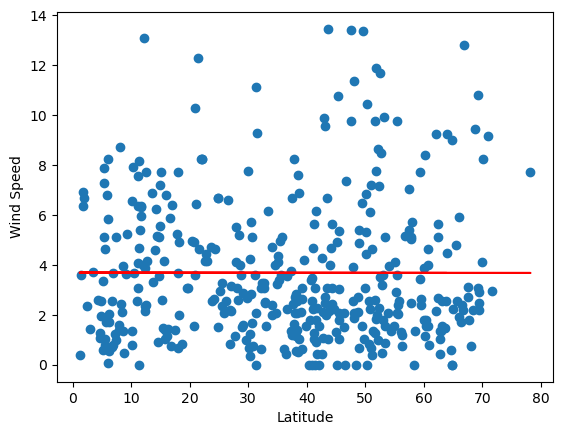

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
linear_regression_plotter(x_values, y_values)

plt.ylabel('Wind Speed')
plt.show()

The r-value is: 0.05856742694037351

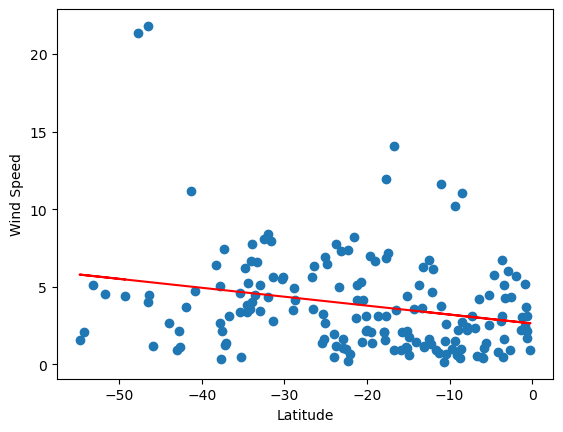

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
linear_regression_plotter(x_values, y_values)

plt.ylabel('Wind Speed')
plt.show()

**Discussion about the linear relationship:** Little relationship observable between wind speed and latitude. I notice the data seems to group around the mean, especially within the northern hemisphere.